In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import sklearn.cross_decomposition as cv
import seaborn as sns
%matplotlib inline

In [2]:
dataset = fetch_california_housing()
x = dataset['data']
y= dataset['target']

# # Split data into trian and test
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size= 0.20, random_state=15)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(16512, 8) (4128, 8)
(16512,) (4128,)


In [3]:
## Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)
train_score_LR = LR.score(x_train,y_train)
print('The train score for LR model {}'.format(train_score_LR))

The train score for LR model 0.6090156808313738


In [4]:
x_train

array([[   2.1705    ,   10.        ,    5.03      , ...,    2.28      ,
          37.87      , -122.3       ],
       [   3.2028    ,   32.        ,    4.21727019, ...,    2.37325905,
          37.78      , -122.49      ],
       [   2.2716    ,   26.        ,    2.89      , ...,    4.7       ,
          33.84      , -117.91      ],
       ...,
       [   3.5871    ,   30.        ,    4.09854015, ...,    1.88321168,
          33.83      , -118.19      ],
       [   4.7333    ,   33.        ,    6.79614325, ...,    2.89807163,
          34.28      , -119.22      ],
       [   5.542     ,   24.        ,    6.83571967, ...,    3.43481537,
          33.85      , -118.26      ]])

In [5]:
y_train

array([1.5  , 3.229, 3.5  , ..., 3.471, 2.575, 1.975])

In [6]:
## Lasso regression model
print('............................Lasso Model....................................')
lasso = Lasso(alpha =0.1)
lasso.fit(x_train,y_train)
train_score_ls = LR.score(x_train,y_train)
print('The train score for lassomodel is {}'.format(train_score_ls))

............................Lasso Model....................................
The train score for lassomodel is 0.6090156808313738


In [7]:
## Ridge Regression Model
print('...............Ridge Regression.................')
ridgeReg= Ridge(alpha = 0.1)
ridgeReg.fit(x_train,y_train)
train_score_ridge = ridgeReg.score(x_train,y_train)
print('The train score for ridge model is {}'.format(train_score_ridge))

...............Ridge Regression.................
The train score for ridge model is 0.6090156804624769


In [8]:
## ElasticNet Regression Model
enet_model = ElasticNet(alpha = 0.1).fit(x_train,y_train)
train_enet_score = enet_model.score(x_train,y_train)

In [9]:
## Testing a model on testing data set
LR_test_score = LR.score(x_test,y_test)
lasso_test_score = lasso.score(x_test,y_test)
Ridge_test_score = ridgeReg.score(x_test,y_test)
enet_test_score = enet_model.score(x_test,y_test)


result = pd.DataFrame({'LR score' : [train_score_LR,LR_test_score],'Lasso score' : [train_score_ls,lasso_test_score], 
                       'Ridge score' : [train_score_ridge,Ridge_test_score], 'Enet score': [train_enet_score,enet_test_score]},
                      index = ['Train score', 'Test score'])

In [10]:
print(result)

             LR score  Lasso score  Ridge score  Enet score
Train score  0.609016     0.609016     0.609016    0.579716
Test score   0.594579     0.523638     0.594578    0.557387


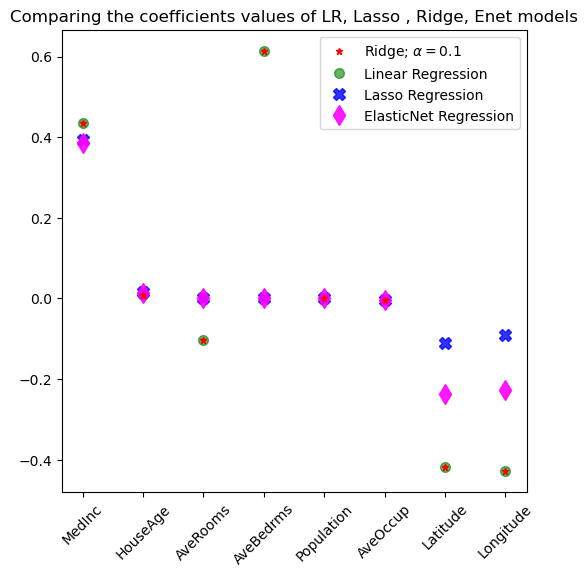

In [11]:
#3 Lets plot the coefficients for both the linear and ridge models
plt.figure(figsize= (6,6))
plt.plot(dataset.feature_names,ridgeReg.coef_,alpha =1,linestyle = 'none',marker = '*',markersize = 5 ,
         color ='r',label = r'Ridge; $\alpha = 0.1$', zorder = 7) ## zorder is that we want it as first in order.

plt.plot(dataset.feature_names,LR.coef_,alpha =0.6,linestyle = 'none',marker = 'o',markersize = 7 ,
         color ='green',label = 'Linear Regression')

plt.plot(dataset.feature_names,lasso.coef_,alpha =0.8,linestyle = 'none',marker = 'X',markersize = 9 ,
         color ='blue',label = 'Lasso Regression')

plt.plot(dataset.feature_names,enet_model.coef_,alpha =0.9,linestyle = 'none',marker = 'd',markersize = 10 ,
         color ='magenta',label = 'ElasticNet Regression')

plt.xticks(rotation =45)
plt.title('Comparing the coefficients values of LR, Lasso , Ridge, Enet models')
plt.legend()
plt.show()

In [12]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV


## Lasso Cross Validation

In [13]:
## using the linear cv model
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
## Lasso Cross Validation
lasso_cv = LassoCV( alphas = [0.0001, 0.0002, 0.0009,0.001,0.002,0.003,0.0035,0.0003,0.01,0.1,1,10],random_state =10).fit(x_train,y_train)
 # score
print(f'training score : {lasso_cv.score(x_train,y_train)}')
print(lasso_cv.alpha_)

training score : 0.6088668691740275
0.002


In [14]:
np.log(4)

1.3862943611198906

In [15]:
## Now choosing the random alpha values instead of giving them manually
alpha = np.logspace(-4,-1,10)
np.empty_like(alpha)
print(alpha)

[0.0001     0.00021544 0.00046416 0.001      0.00215443 0.00464159
 0.01       0.02154435 0.04641589 0.1       ]


In [16]:
alphas = np.logspace(-4,-1,10)
scores = np.empty_like(alpha)


for i,a in enumerate(alphas):
    lasso  = Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(x_train, y_train)
    scores[i] = lasso.score(x_train,y_train)
print(scores)

[0.60901531 0.60901395 0.60900767 0.60897848 0.608843   0.60821409
 0.60529465 0.59836632 0.58788991 0.5488268 ]


0.03221092661065102


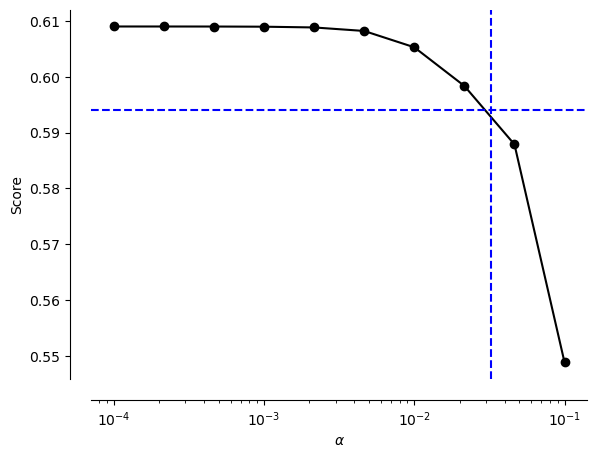

In [17]:

lassocv = LassoCV(random_state =0)
lassocv.fit(x,y)
lassocv_score = lassocv.score(x_train,y_train)
lassocv_alpha = lassocv.alpha_
print(lassocv_alpha)
## print('CV',lassocv.coef_)
plt.plot(alphas,scores,'-ko')
plt.axhline(lassocv_score,color = 'b', ls ='--')
plt.axvline(lassocv_alpha,color = 'b', ls ='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.xscale('log')
sns.despine(offset=15)

## Model Tuning

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
alphas = np.logspace(-3,1,num =30)

model = make_pipeline(StandardScaler(), RidgeCV(alphas = alphas))
cv_results = cross_validate(model,x_train,y_train,return_estimator = True,n_jobs = 2)
print(cv_results)

{'fit_time': array([0.07888293, 0.07568455, 0.0680182 , 0.07201314, 0.05442834]), 'score_time': array([0.00150585, 0.00150585, 0.00199533, 0.00199032, 0.001019  ]), 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-03, 2.59294380e-03,
       3.56224789e-03, 4.89390092e-03, 6.72335754e-03, 9.23670857e-03,
       1.26896100e-02, 1.74332882e-02, 2.39502662e-02, 3.29034456e-02,
       4.52035366e-02, 6.21016942e-02, 8.53167852e-02, 1.17210230e-01,
       1.61026203e-01, 2.21221629e-01, 3.03919538e-01, 4.17531894e-01,
       5.73615251e-01, 7.88046282e-01, 1.08263673e+00, 1.48735211e+00,
       2.04335972e+00, 2.80721620e+00, 3.85662042e+00, 5.29831691e+00,
       7.27895384e+00, 1.00000000e+01])))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-

In [19]:
score = cv_results['test_score']
print(score)
print(f'R2 score: {score.mean():.3f} +_ {score.std(): .3f}')

[0.63949534 0.60571284 0.61115815 0.56191319 0.60883357]
R2 score: 0.605 +_  0.025


In [20]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import cross_validate
alphas = np.logspace(-3,1,num =30)

model = make_pipeline(Normalizer(), ElasticNetCV(alphas = alphas))
cv_results = cross_validate(model,x_train,y_train,return_estimator = True,n_jobs = 2)
print(cv_results)

{'fit_time': array([0.07012177, 0.07012177, 0.07319546, 0.0702107 , 0.06138206]), 'score_time': array([0.00150704, 0.        , 0.00196767, 0.00099158, 0.00099659]), 'estimator': [Pipeline(steps=[('normalizer', Normalizer()),
                ('elasticnetcv',
                 ElasticNetCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-03, 2.59294380e-03,
       3.56224789e-03, 4.89390092e-03, 6.72335754e-03, 9.23670857e-03,
       1.26896100e-02, 1.74332882e-02, 2.39502662e-02, 3.29034456e-02,
       4.52035366e-02, 6.21016942e-02, 8.53167852e-02, 1.17210230e-01,
       1.61026203e-01, 2.21221629e-01, 3.03919538e-01, 4.17531894e-01,
       5.73615251e-01, 7.88046282e-01, 1.08263673e+00, 1.48735211e+00,
       2.04335972e+00, 2.80721620e+00, 3.85662042e+00, 5.29831691e+00,
       7.27895384e+00, 1.00000000e+01])))]), Pipeline(steps=[('normalizer', Normalizer()),
                ('elasticnetcv',
                 ElasticNetCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.887391

In [21]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import cross_validate
alphas = np.logspace(-3,1,num =30)

model = make_pipeline(StandardScaler(), ElasticNetCV(alphas = alphas))
cv_results = cross_validate(model,x_train,y_train,return_estimator = True,n_jobs = 2)
print(cv_results)

{'fit_time': array([0.07157207, 0.06857967, 0.0677104 , 0.07130194, 0.06682849]), 'score_time': array([0.00099635, 0.00099683, 0.00099778, 0.00099802, 0.00118303]), 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnetcv',
                 ElasticNetCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-03, 2.59294380e-03,
       3.56224789e-03, 4.89390092e-03, 6.72335754e-03, 9.23670857e-03,
       1.26896100e-02, 1.74332882e-02, 2.39502662e-02, 3.29034456e-02,
       4.52035366e-02, 6.21016942e-02, 8.53167852e-02, 1.17210230e-01,
       1.61026203e-01, 2.21221629e-01, 3.03919538e-01, 4.17531894e-01,
       5.73615251e-01, 7.88046282e-01, 1.08263673e+00, 1.48735211e+00,
       2.04335972e+00, 2.80721620e+00, 3.85662042e+00, 5.29831691e+00,
       7.27895384e+00, 1.00000000e+01])))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnetcv',
                 ElasticNetCV(alphas=array([1.00000000e-03, 1.373823

In [22]:
!pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable


In [31]:
from ucimlrepo import fetch_ucirepo

#fetch dataset
wine_quality = fetch_ucirepo(id = 186)

In [32]:
# data(as pandas dataframes)
x = wine_quality.data.features
y = wine_quality.data.targets
print(y)

      quality
0           5
1           5
2           5
3           6
4           5
...       ...
6492        6
6493        5
6494        6
6495        7
6496        6

[6497 rows x 1 columns]


In [33]:
## metadata
print(wine_quality.metadata)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [34]:
## Variable information
print(wine_quality.variables)

                    name     role         type demographic  \
0          fixed_acidity  Feature   Continuous        None   
1       volatile_acidity  Feature   Continuous        None   
2            citric_acid  Feature   Continuous        None   
3         residual_sugar  Feature   Continuous        None   
4              chlorides  Feature   Continuous        None   
5    free_sulfur_dioxide  Feature   Continuous        None   
6   total_sulfur_dioxide  Feature   Continuous        None   
7                density  Feature   Continuous        None   
8                     pH  Feature   Continuous        None   
9              sulphates  Feature   Continuous        None   
10               alcohol  Feature   Continuous        None   
11               quality   Target      Integer        None   
12                 color    Other  Categorical        None   

               description units missing_values  
0                     None  None             no  
1                     None  Non